In [1]:
import numpy as np
import pylab as plt
import drawSvg as draw
from skimage import io, filters, measure, feature, exposure, morphology
from scipy import ndimage
from scipy.ndimage import rotate
import os
%matplotlib inline

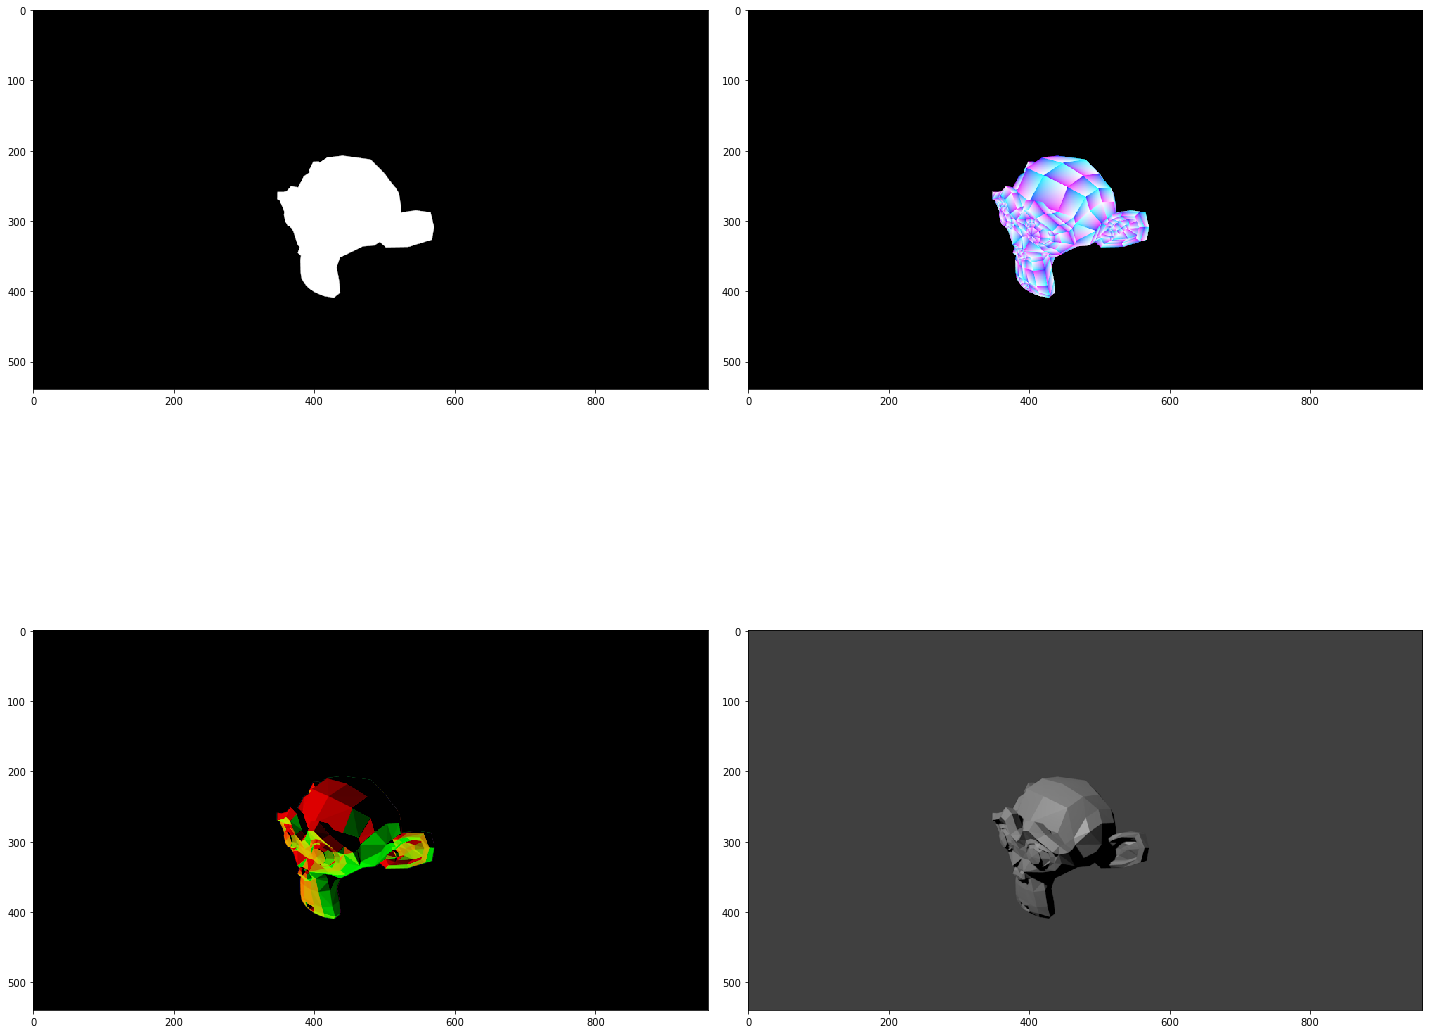

In [2]:
ao_monkey = io.imread('TestMonkey/AO.png')
uv_monkey = io.imread('TestMonkey/UV.png')
normal_monkey = io.imread('TestMonkey/Normal.png')
original_monkey = io.imread('TestMonkey/Original.png')

fig=plt.figure(figsize=(20, 20))

fig.add_subplot(2, 2, 1)
plt.imshow(ao_monkey)
fig.add_subplot(2, 2, 2)
plt.imshow(uv_monkey)
fig.add_subplot(2, 2, 3)
plt.imshow(normal_monkey)
fig.add_subplot(2, 2, 4)
plt.imshow(original_monkey)
fig.tight_layout()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


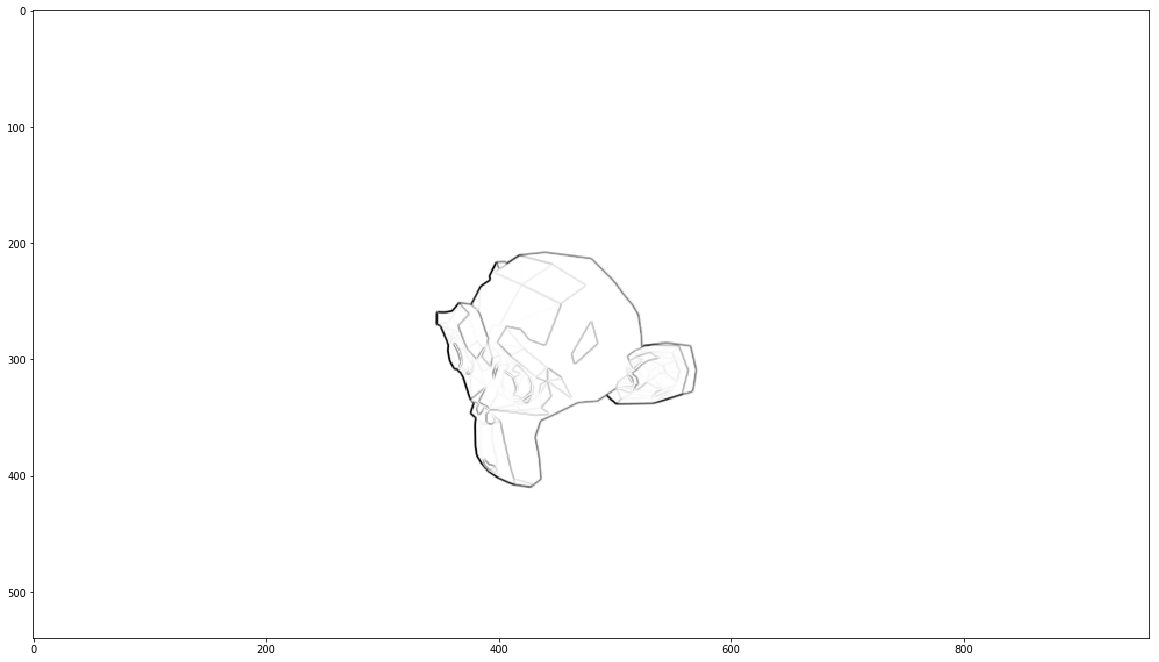

In [3]:
edge_monkey = filters.sobel(normal_monkey[:,:,0]) + filters.sobel(ao_monkey[:,:,0])
print(edge_monkey)
#edge_monkey = ndimage.gaussian_filter(edge_monkey, sigma=0.5)
plt.figure(figsize=(20,20))
plt.imshow((edge_monkey), cmap = plt.cm.Greys)

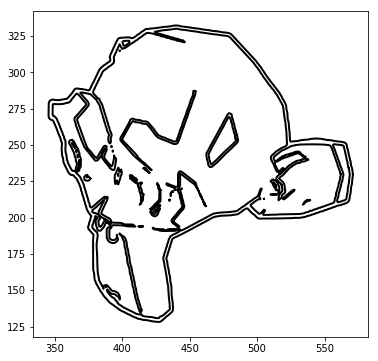

In [4]:
new_edge_monkey =np.rot90(edge_monkey, k=-1)
contours = measure.find_contours(new_edge_monkey, 0.3, fully_connected="high")
simplified_contours = [measure.approximate_polygon(c, tolerance=0) for c in contours]
plt.figure(figsize=(6,6))
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 0], contour[:, 1], linewidth=2, color="black")

(array([0., 3., 1., 2., 4., 1., 0., 0., 2., 0., 1., 1., 0., 3., 2., 1., 2.,
        0., 2., 2., 2., 0., 1., 3., 1., 3., 0., 0., 3., 1., 1., 1., 0., 0.,
        0., 2., 0., 1., 2., 0., 1., 2., 1., 2., 2., 1., 0., 4., 1., 2., 1.,
        2., 0., 3., 0., 1., 2., 1., 0., 3., 2., 1., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 2., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 1., 3., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41, 

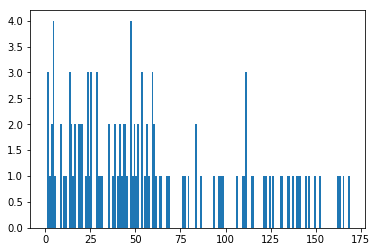

In [5]:
histogram = exposure.histogram(original_monkey[:,:,0])
plt.figure()
plt.hist(histogram[0], histogram[1])

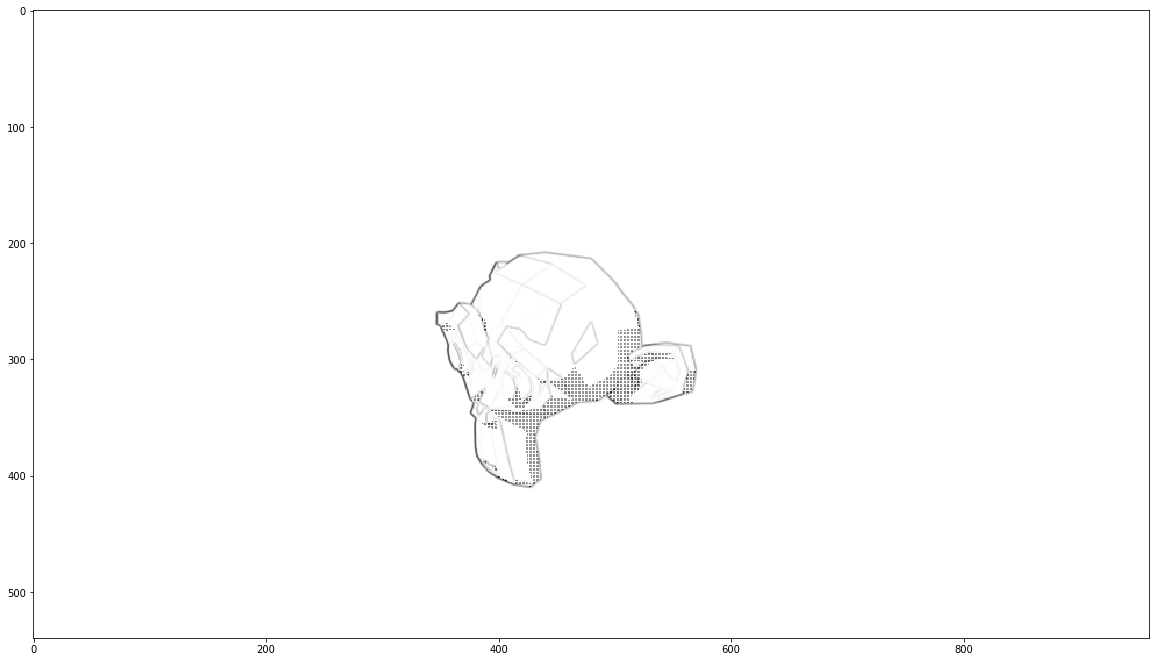

In [6]:
original_monkey_shade = np.copy(original_monkey)
original_monkey_shade[original_monkey_shade[:,:,0]>25] = 0
original_monkey_shade[::3] = 1
original_monkey_shade[:, ::3] = 1
shade_monkey = original_monkey_shade[:,:,3]/256 + edge_monkey
plt.figure(figsize=(20,20))
plt.imshow(shade_monkey, cmap = plt.cm.Greys)

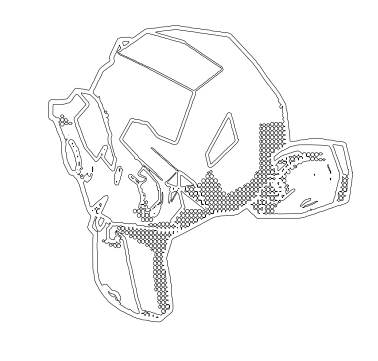

In [7]:
vector_shade_monkey = np.rot90(shade_monkey, k=-1)
contours = measure.find_contours(vector_shade_monkey, 0.2, fully_connected="high")
simplified_contours = [measure.approximate_polygon(c, tolerance=0) for c in contours]
plt.figure(figsize=(6,6))
plt.axis("off")
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 0], contour[:, 1], linewidth=0.5, color="black")
plt.savefig("suzzane.svg")